In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
data = pd.read_csv("data/cali_combined.csv")

In [4]:
data = data.drop(columns = "Unnamed: 0")

In [5]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,is_geocoding_exact,Geographic Area,Median Income,percent_completed_hs,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,...,True,CA,81294.0,87.0,13.2,48.5,6.1,0.5,33.3,15.1
1,19,Patrick Wetter,2015-01-06,shot and Tasered,knife,25.0,M,W,Stockton,CA,...,True,CA,44797.0,74.9,25.3,37.0,12.2,1.1,21.5,40.3
2,43,Brian Barbosa,2015-01-11,shot,gun,23.0,M,H,South Gate,CA,...,True,CA,43552.0,52.4,20.0,50.5,0.9,0.9,0.8,94.8
3,63,Jose Ceja,2015-01-15,shot,knife,36.0,M,H,Fairfield,CA,...,True,CA,67364.0,85.6,13.2,46.0,15.7,0.8,14.9,27.3
4,68,Zaki Shinwary,2015-01-16,shot and Tasered,knife,48.0,M,O,Fremont,CA,...,True,CA,105355.0,92.3,6.1,32.8,3.3,0.5,50.6,14.8


In [6]:
race_grouping = data.loc[:, ["id", "race"]]
race_grouping = race_grouping.groupby(["race"])["id"].count()
race_grouping = pd.DataFrame(race_grouping)
race_grouping.head(10)

,id
race,
A,33
B,144
H,356
N,4
O,8
W,251


In [7]:
city_counts = data.loc[:, ["id", "city", "share_black"]]
city_counts.head()
city_counts = city_counts.rename(columns ={"share_black" : "Black Population (%)"})
city_grouped = city_counts.groupby(["city", "Black Population (%)"])["id"].count()

In [8]:
city_grouped = pd.DataFrame(city_grouped)
city_grouped = city_grouped.rename(columns = {"id" : "Shooting Count"})
city_grouped = city_grouped.reset_index()
city_grouped = city_grouped.sort_values("Shooting Count", ascending=False)
city_grouped.head(20)

,city,Black Population (%),Shooting Count
150,Los Angeles,9.6,91
19,Bakersfield,8.2,26
95,Fresno,8.3,22
237,San Jose,3.2,21
149,Long Beach,13.5,19
233,San Diego,6.7,19
229,Sacramento,14.6,18
231,San Bernardino,15.0,17
235,San Francisco,6.1,16
264,Stockton,12.2,13


In [9]:
city_grouped = city_grouped.drop(city_grouped.index[0])
city_grouped.head()

,city,Black Population (%),Shooting Count
19,Bakersfield,8.2,26
95,Fresno,8.3,22
237,San Jose,3.2,21
149,Long Beach,13.5,19
233,San Diego,6.7,19


Text(10, 40, 'y = 0.09x + 2.04')

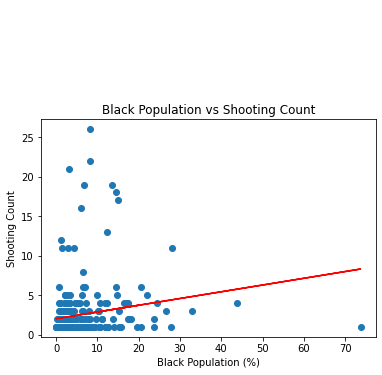

In [12]:
x= city_grouped["Black Population (%)"]
y= city_grouped["Shooting Count"]
plt.scatter(x, y)
plt.xlabel('Black Population (%)')
plt.ylabel('Shooting Count')
plt.title('Black Population vs Shooting Count')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x ,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")

In [13]:
correlation = st.pearsonr(x, y)
print(f"The correlation between percent black population and shooting count is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")

The correlation between percent black population and shooting count is 0.18
The r-squared is: 0.03211249919381063


In [15]:
city_counts2 = data.loc[:, ["id", "city", "poverty_rate"]]
city_counts2 = city_counts2.rename(columns ={"poverty_rate" : "Poverty Rate (%)"})
city_grouped2 = city_counts2.groupby(["city", "Poverty Rate (%)"])["id"].count()

In [16]:
city_grouped2 = pd.DataFrame(city_grouped2)
city_grouped2 = city_grouped2.rename(columns = {"id" : "Shooting Count"})
city_grouped2 = city_grouped2.reset_index()
city_grouped2 = city_grouped2.sort_values("Shooting Count", ascending=False)
city_grouped2.head(20)

,city,Poverty Rate (%),Shooting Count
150,Los Angeles,22.1,91
19,Bakersfield,19.8,26
95,Fresno,29.8,22
237,San Jose,11.3,21
149,Long Beach,20.6,19
233,San Diego,15.4,19
229,Sacramento,22.0,18
231,San Bernardino,33.4,17
235,San Francisco,13.2,16
264,Stockton,25.3,13


In [17]:
city_grouped2 = city_grouped2.drop(city_grouped2.index[0])
city_grouped2.head()

,city,Poverty Rate (%),Shooting Count
19,Bakersfield,19.8,26
95,Fresno,29.8,22
237,San Jose,11.3,21
149,Long Beach,20.6,19
233,San Diego,15.4,19


Text(10, 40, 'y = 0.02x + 2.08')

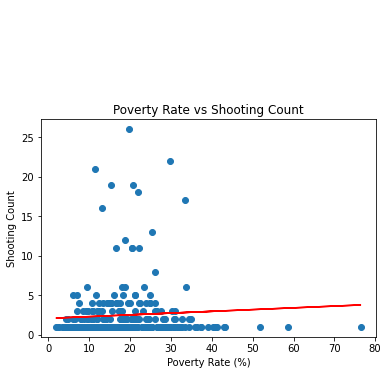

In [18]:
x= city_grouped2["Poverty Rate (%)"]
y= city_grouped2["Shooting Count"]
plt.scatter(x, y)
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Shooting Count')
plt.title('Poverty Rate vs Shooting Count')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x ,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")

In [19]:
city_counts3 = data.loc[:, ["id", "city", "percent_completed_hs"]]
city_counts3 = city_counts3.rename(columns ={"percent_completed_hs" : "Finished Highschool (%)"})
city_grouped3 = city_counts3.groupby(["city", "Finished Highschool (%)"])["id"].count()

In [20]:
city_grouped3 = pd.DataFrame(city_grouped3)
city_grouped3 = city_grouped3.rename(columns = {"id" : "Shooting Count"})
city_grouped3 = city_grouped3.reset_index()
city_grouped3 = city_grouped3.sort_values("Shooting Count", ascending=False)
city_grouped3.head(20)

,city,Finished Highschool (%),Shooting Count
150,Los Angeles,75.5,91
19,Bakersfield,79.6,26
95,Fresno,75.2,22
237,San Jose,82.7,21
149,Long Beach,79.4,19
233,San Diego,87.3,19
229,Sacramento,83.4,18
231,San Bernardino,68.2,17
235,San Francisco,87.0,16
264,Stockton,74.9,13


In [21]:
city_grouped3 = city_grouped3.drop(city_grouped3.index[0])
city_grouped3.head()

,city,Finished Highschool (%),Shooting Count
19,Bakersfield,79.6,26
95,Fresno,75.2,22
237,San Jose,82.7,21
149,Long Beach,79.4,19
233,San Diego,87.3,19


Text(10, 40, 'y = -0.0x + 2.79')

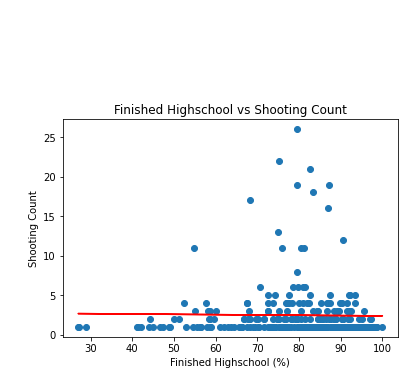

In [22]:
x= city_grouped3["Finished Highschool (%)"]
y= city_grouped3["Shooting Count"]
plt.scatter(x, y)
plt.xlabel('Finished Highschool (%)')
plt.ylabel('Shooting Count')
plt.title('Finished Highschool vs Shooting Count')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x ,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")

In [23]:
city_counts4 = data.loc[:, ["id", "city", "Median Income"]]
city_grouped4 = city_counts4.groupby(["city", "Median Income"])["id"].count()

In [24]:
city_grouped4 = pd.DataFrame(city_grouped4)
city_grouped4 = city_grouped4.rename(columns = {"id" : "Shooting Count"})
city_grouped4 = city_grouped4.reset_index()
city_grouped4 = city_grouped4.sort_values("Shooting Count", ascending=False)
city_grouped4.head(20)

,city,Median Income,Shooting Count
150,Los Angeles,50205.0,91
19,Bakersfield,57095.0,26
95,Fresno,41531.0,22
237,San Jose,84647.0,21
149,Long Beach,52783.0,19
233,San Diego,66116.0,19
229,Sacramento,50739.0,18
231,San Bernardino,37047.0,17
235,San Francisco,81294.0,16
264,Stockton,44797.0,13


In [25]:
city_grouped4 = city_grouped4.drop(city_grouped4.index[0])
city_grouped4.head()

,city,Median Income,Shooting Count
19,Bakersfield,57095.0,26
95,Fresno,41531.0,22
237,San Jose,84647.0,21
149,Long Beach,52783.0,19
233,San Diego,66116.0,19


Text(10, 40, 'y = -0.0x + 2.92')

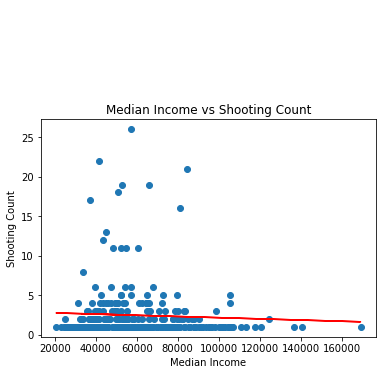

In [26]:
x= city_grouped4["Median Income"]
y= city_grouped4["Shooting Count"]
plt.scatter(x, y)
plt.xlabel('Median Income')
plt.ylabel('Shooting Count')
plt.title('Median Income vs Shooting Count')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x ,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")